In [9]:
import numpy as np
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#!wget --no-check-certificate \
#    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
#    -O /tmp/sarcasm.json



In [10]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [11]:
root = r'D:\Users\Arkady\Verint\Coursera_2019_Tensorflow_Specialization\Course3_NLP'

In [12]:
with open(root + "/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_4 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 50
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [15]:
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Train on 20000 samples, validate on 6709 samples
Epoch 1/50
20000/20000 [==============================] - 45s 2ms/sample - loss: 0.4493 - accuracy: 0.7731 - val_loss: 0.3875 - val_accuracy: 0.8237
Epoch 2/50
20000/20000 [==============================] - 38s 2ms/sample - loss: 0.3550 - accuracy: 0.8353 - val_loss: 0.3788 - val_accuracy: 0.8235
Epoch 3/50
20000/20000 [==============================] - 37s 2ms/sample - loss: 0.3294 - accuracy: 0.8500 - val_loss: 0.3663 - val_accuracy: 0.8371
Epoch 4/50
20000/20000 [==============================] - 36s 2ms/sample - loss: 0.3119 - accuracy: 0.8608 - val_loss: 0.3702 - val_accuracy: 0.8357
Epoch 5/50
20000/20000 [==============================] - 36s 2ms/sample - loss: 0.2996 - accuracy: 0.8663 - val_loss: 0.3679 - val_accuracy: 0.8347
Epoch 6/50
20000/20000 [==============================] - 37s 2ms/sample - loss: 0.2893 - accuracy: 0.8734 - val_loss: 0.3747 - val_accuracy: 0.8337
Epoch 7/50
20000/20000 [==============================] -

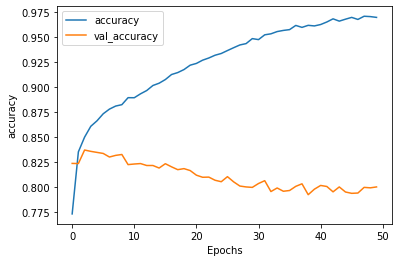

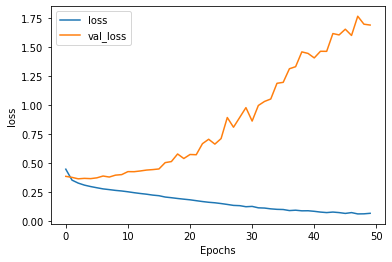

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [18]:
model.save(root + "test.h5")